In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from utils.utils import *

In [16]:
dataset = SHDataset(noise=True, noise_config=1)
G1,T1,G2,T2 = dataset.read_snapshots(0)

Adding noise to trajectories: 100%|██████████| 89079/89079 [00:55<00:00, 1593.22it/s]


In [35]:
from models.hmm import HMMChangeDetector

G_diff = compare_snapshots(G1,G2)[1]
G_vis = G_diff.copy()

t_idx = 2
t = T2['T'][t_idx]

det = HMMChangeDetector(G1)
states = det.map_match_trajectory(t)

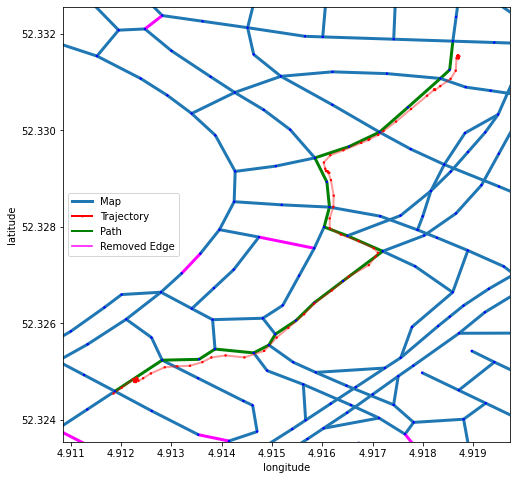

In [44]:

path_colors = {state: 'green' for state in states}
nx.set_edge_attributes(G_vis, path_colors, 'color')
plot_graph(snapshot_to_nxgraph(G_vis, [t]), zoom_on_traj=True, show_nodes=True, T_node_size=2, T_edge_width=2,
          G_edge_width=3, G_node_size=2, traj_alpha=0.4)

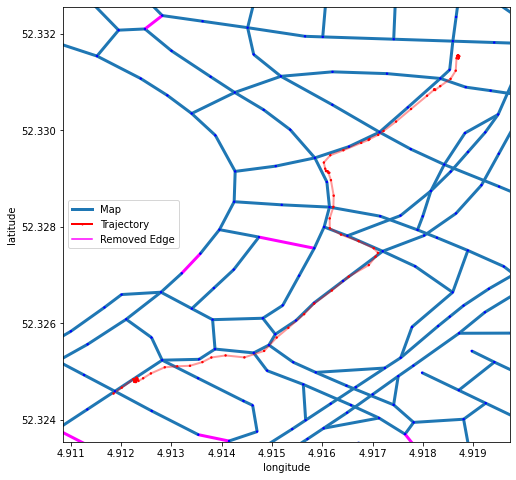

In [45]:
plot_graph(snapshot_to_nxgraph(G_diff, [t]), zoom_on_traj=True, show_nodes=True, T_node_size=2, T_edge_width=2,
          G_edge_width=3, G_node_size=2, traj_alpha=0.4)